#Amortization: Amortized Analysis

Aggregate Method: The aggregate method calculates the total cost of a sequence of operations and then divides it by the number of operations to obtain the average cost.



In [ ]:
class AggregateMethod:
    def __init__(self):
        self.total_cost = 0

    def operation(self, cost):
        self.total_cost += cost

    def amortized_cost(self, n):
        return self.total_cost / n

# Example Usage
am = AggregateMethod()
operations = [3, 2, 4, 1, 2]
for op_cost in operations:
    am.operation(op_cost)

n = len(operations)
print("Amortized cost using Aggregate Method:", am.amortized_cost(n))


Amortized cost using Aggregate Method: 2.4


Accounting Method: The accounting method assigns an amortized cost to each operation, charging it more or less than its actual cost. The difference is stored for later use.



In [ ]:
class AccountingMethod:
    def __init__(self):
        self.balance = 0

    def operation(self, cost):
        self.balance += cost

    def amortized_cost(self):
        return self.balance

# Example Usage
ac = AccountingMethod()
operations = [3, 2, 4, 1, 2]
for op_cost in operations:
    ac.operation(op_cost)

print("Amortized cost using Accounting Method:", ac.amortized_cost())


Amortized cost using Accounting Method: 12


Charging Method: The charging method charges some operations more than their actual cost and uses the extra charge to pay for operations that are charged less than their actual cost.



In [ ]:
class ChargingMethod:
    def __init__(self):
        self.balance = 0

    def operation(self, cost):
        self.balance += cost

    def amortized_cost(self):
        return self.balance

# Example Usage
cm = ChargingMethod()
operations = [3, 2, 4, 1, 2]
for op_cost in operations:
    cm.operation(op_cost)

print("Amortized cost using Charging Method:", cm.amortized_cost())

Amortized cost using Charging Method: 12


Potential Method: The potential method computes the amortized cost as the actual cost of the operation plus the change in potential caused by the operation.

In [ ]:
class PotentialMethod:
    def __init__(self):
        self.potential = 0

    def operation(self, actual_cost):
        self.potential += actual_cost

    def amortized_cost(self, actual_cost):
        return actual_cost + self.potential

# Example Usage
pm = PotentialMethod()
operations = [3, 2, 4, 1, 2]
for op_cost in operations:
    print("Amortized cost using Potential Method for operation {}: {}".format(op_cost, pm.amortized_cost(op_cost)))
    pm.operation(op_cost)


Amortized cost using Potential Method for operation 3: 3
Amortized cost using Potential Method for operation 2: 5
Amortized cost using Potential Method for operation 4: 9
Amortized cost using Potential Method for operation 1: 10
Amortized cost using Potential Method for operation 2: 12


#Table doubling


Table doubling is a common technique used in data structures such as hash tables to resize the underlying array when the load factor exceeds a certain threshold.

In [ ]:
class HashTable:
    def __init__(self, initial_capacity=8):
        self.capacity = initial_capacity
        self.size = 0
        self.table = [None] * self.capacity

    def hash_function(self, key):
        return hash(key) % self.capacity

    def resize(self, new_capacity):
        old_table = self.table
        self.capacity = new_capacity
        self.table = [None] * self.capacity
        self.size = 0

        for item in old_table:
            if item is not None:
                self.insert(item[0], item[1])

    def insert(self, key, value):
        if (self.size / self.capacity) > 0.7:
            self.resize(self.capacity * 2)

        index = self.hash_function(key)
        while self.table[index] is not None and self.table[index][0] != key:
            index = (index + 1) % self.capacity

        if self.table[index] is None:
            self.size += 1
        self.table[index] = (key, value)

    def get(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None and self.table[index][0] != key:
            index = (index + 1) % self.capacity
        if self.table[index] is None:
            return None
        else:
            return self.table[index][1]

    def delete(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index] = None
                self.size -= 1
                return
            index = (index + 1) % self.capacity

    def display(self):
        for index, item in enumerate(self.table):
            if item is not None:
                print(index, ":", item)


# Example usage:
ht = HashTable()
ht.insert("apple", 10)
ht.insert("banana", 20)
ht.insert("orange", 30)
ht.insert("grape", 40)

print("After insertion:")
ht.display()

print("\nValue of 'orange' key:", ht.get("orange"))

ht.delete("banana")
print("\nAfter deletion of 'banana':")
ht.display()


After insertion:
0 : ('grape', 40)
3 : ('banana', 20)
6 : ('orange', 30)
7 : ('apple', 10)

Value of 'orange' key: 30

After deletion of 'banana':
0 : ('grape', 40)
6 : ('orange', 30)
7 : ('apple', 10)


#Binary counter

A binary counter is a type of counter that counts in binary digits.

In [ ]:
class BinaryCounter:
    def __init__(self, size):
        self.size = size
        self.bits = [0] * size  # Initialize all bits to 0

    def increment(self):
        carry = 1
        index = 0
        while carry and index < self.size:
            self.bits[index] += carry
            if self.bits[index] > 1:
                self.bits[index] = 0
                carry = 1
                index += 1
            else:
                carry = 0

    def get_value(self):
        # Convert binary digits to decimal
        decimal_value = 0
        for i in range(self.size):
            decimal_value += self.bits[i] * (2 ** i)
        return decimal_value

    def display(self):
        # Display the binary representation
        print("Binary Counter:", end=" ")
        for bit in reversed(self.bits):
            print(bit, end="")
        print()


# Example usage:
size = 4  # Size of the binary counter
counter = BinaryCounter(size)

# Increment the counter a few times
for _ in range(10):
    counter.increment()
    counter.display()

# Get the decimal value of the counter
print("Decimal Value:", counter.get_value())


Binary Counter: 0001
Binary Counter: 0010
Binary Counter: 0011
Binary Counter: 0100
Binary Counter: 0101
Binary Counter: 0110
Binary Counter: 0111
Binary Counter: 1000
Binary Counter: 1001
Binary Counter: 1010
Decimal Value: 10


#2-3 Tree


In [ ]:
class Node23:
    def __init__(self):
        self.keys = []
        self.children = []

class TwoThreeTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if not self.root:
            self.root = Node23()
            self.root.keys.append(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if len(node.keys) == 3:
            if not node.children:
                node.children = [Node23(), Node23()]
                node.children[0].keys = [node.keys[0]]
                node.children[1].keys = [node.keys[2]]
            else:
                node.children[0].keys.append(node.keys[0])
                node.children[1].keys.append(node.keys[2])
            node.keys = [node.keys[1]]

            if key < node.keys[0]:
                self._insert(node.children[0], key)
            else:
                self._insert(node.children[1], key)
        else:
            node.keys.append(key)
            node.keys.sort()

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if not node:
            return False
        if key in node.keys:
            return True
        elif len(node.children) == 0:
            return False
        elif key < node.keys[0]:
            return self._search(node.children[0], key)
        else:
            return self._search(node.children[-1], key)

    def display(self):
        self._display(self.root)

    def _display(self, node):
        if node:
            print(node.keys)
            for child in node.children:
                self._display(child)

# Example usage:
tree = TwoThreeTree()
tree.insert(10)
tree.insert(5)
tree.insert(15)
tree.insert(20)
tree.insert(3)
tree.insert(7)
tree.display()
print("Search for 15:", tree.search(15))


[3, 7, 10]
[5]
[15, 20]
Search for 15: True


#2-5 Tree

In [ ]:
class Node25:
    def __init__(self):
        self.keys = []
        self.children = []

class TwoFiveTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if not self.root:
            self.root = Node25()
            self.root.keys.append(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if len(node.keys) == 5:
            if not node.children:
                node.children = [Node25(), Node25(), Node25()]
                node.children[0].keys = [node.keys[0], node.keys[1]]
                node.children[1].keys = [node.keys[3], node.keys[4]]
                node.children[2].keys = [node.keys[2]]
            else:
                node.children[0].keys.append(node.keys[0])
                node.children[0].keys.append(node.keys[1])
                node.children[1].keys.append(node.keys[3])
                node.children[1].keys.append(node.keys[4])
                node.children[2].keys.append(node.keys[2])

            if key < node.keys[2]:
                self._insert(node.children[0], key)
            elif key < node.keys[4]:
                self._insert(node.children[1], key)
            else:
                self._insert(node.children[2], key)
        else:
            node.keys.append(key)
            node.keys.sort()

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if not node:
            return False
        if key in node.keys:
            return True
        elif len(node.children) == 0:
            return False
        elif key < node.keys[0]:
            return self._search(node.children[0], key)
        elif key < node.keys[2]:
            return self._search(node.children[1], key)
        elif key < node.keys[4]:
            return self._search(node.children[2], key)
        else:
            return False

    def display(self):
        self._display(self.root)

    def _display(self, node):
        if node:
            print(node.keys)
            for child in node.children:
                self._display(child)

# Example usage:
tree = TwoFiveTree()
tree.insert(10)
tree.insert(5)
tree.insert(15)
tree.insert(20)
tree.insert(3)
tree.insert(7)
tree.display()
print("Search for 15:", tree.search(15))


[3, 5, 10, 15, 20]
[3, 5, 7]
[15, 20]
[10]
Search for 15: True


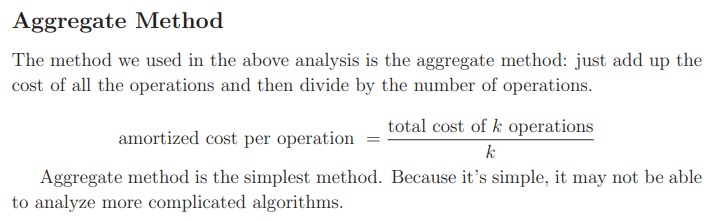

Table Doubling

In [9]:
class TableDoublingAggregateMethod:
    def __init__(self):
        self.resize_count = 0
        self.total_operations = 0

    def operation(self, operation_type):
        if operation_type == "insert":
            self.total_operations += 1
            if self.total_operations > (1 << self.resize_count):
                self.resize_count += 1

    def amortized_cost(self):
        return self.resize_count / self.total_operations

# Example Usage:
table_doubling_am = TableDoublingAggregateMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    table_doubling_am.operation(op_type)

print("Amortized cost using Aggregate Method for Table Doubling:", table_doubling_am.amortized_cost())


Amortized cost using Aggregate Method for Table Doubling: 0.4


Binary Counter

In [10]:
class BinaryCounterAggregateMethod:
    def __init__(self, size):
        self.size = size
        self.total_operations = 0

    def operation(self, operation_type):
        if operation_type == "increment":
            self.total_operations += 1

    def amortized_cost(self):
        return self.size / self.total_operations

# Example Usage:
binary_counter_am = BinaryCounterAggregateMethod(4)  # Example: Binary counter of size 4
operations = ["increment"] * 10  # Example: 10 increment operations
for op_type in operations:
    binary_counter_am.operation(op_type)

print("Amortized cost using Aggregate Method for Binary Counter:", binary_counter_am.amortized_cost())


Amortized cost using Aggregate Method for Binary Counter: 0.4


2-3 Tree

In [11]:
class TwoThreeTreeAggregateMethod:
    def __init__(self):
        self.total_operations = 0
        self.node_creations = 0

    def operation(self, operation_type, created_nodes=0):
        self.total_operations += 1
        if operation_type == "insert":
            self.node_creations += created_nodes

    def amortized_cost(self):
        return self.node_creations / self.total_operations

# Example Usage:
two_three_tree_am = TwoThreeTreeAggregateMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_three_tree_am.operation(op_type, created_nodes=2)  # Assuming each insert operation creates 2 nodes

print("Amortized cost using Aggregate Method for 2-3 Tree:", two_three_tree_am.amortized_cost())


Amortized cost using Aggregate Method for 2-3 Tree: 2.0


2-5 Tree

In [12]:
class TwoFiveTreeAggregateMethod:
    def __init__(self):
        self.total_operations = 0
        self.node_creations = 0

    def operation(self, operation_type, created_nodes=0):
        self.total_operations += 1
        if operation_type == "insert":
            self.node_creations += created_nodes

    def amortized_cost(self):
        return self.node_creations / self.total_operations

# Example Usage:
two_five_tree_am = TwoFiveTreeAggregateMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_five_tree_am.operation(op_type, created_nodes=3)  # Assuming each insert operation creates 3 nodes

print("Amortized cost using Aggregate Method for 2-5 Tree:", two_five_tree_am.amortized_cost())


Amortized cost using Aggregate Method for 2-5 Tree: 3.0


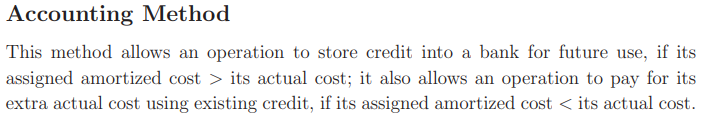

Table Doubling

In [13]:
class TableDoublingAccountingMethod:
    def __init__(self):
        self.balance = 0

    def operation(self, operation_type):
        if operation_type == "insert":
            self.balance += 1
            if self.balance > 1:
                self.balance -= 1

    def amortized_cost(self):
        return self.balance

# Example Usage:
table_doubling_acc = TableDoublingAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    table_doubling_acc.operation(op_type)

print("Amortized cost using Accounting Method for Table Doubling:", table_doubling_acc.amortized_cost())


Amortized cost using Accounting Method for Table Doubling: 1


Binary Counter

In [14]:
class BinaryCounterAccountingMethod:
    def __init__(self, size):
        self.size = size
        self.balance = 0

    def operation(self, operation_type):
        if operation_type == "increment":
            self.balance += 1
            if self.balance > self.size:
                self.balance -= self.size

    def amortized_cost(self):
        return self.balance

# Example Usage:
binary_counter_acc = BinaryCounterAccountingMethod(4)  # Example: Binary counter of size 4
operations = ["increment"] * 10  # Example: 10 increment operations
for op_type in operations:
    binary_counter_acc.operation(op_type)

print("Amortized cost using Accounting Method for Binary Counter:", binary_counter_acc.amortized_cost())


Amortized cost using Accounting Method for Binary Counter: 2


2-3 Tree


In [15]:
class TwoThreeTreeAccountingMethod:
    def __init__(self):
        self.balance = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.balance += created_nodes

    def amortized_cost(self):
        return self.balance

# Example Usage:
two_three_tree_acc = TwoThreeTreeAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_three_tree_acc.operation(op_type, created_nodes=2)  # Assuming each insert operation creates 2 nodes

print("Amortized cost using Accounting Method for 2-3 Tree:", two_three_tree_acc.amortized_cost())


Amortized cost using Accounting Method for 2-3 Tree: 20


2-5 Tree

In [16]:
class TwoFiveTreeAccountingMethod:
    def __init__(self):
        self.balance = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.balance += created_nodes

    def amortized_cost(self):
        return self.balance

# Example Usage:
two_five_tree_acc = TwoFiveTreeAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_five_tree_acc.operation(op_type, created_nodes=3)  # Assuming each insert operation creates 3 nodes

print("Amortized cost using Accounting Method for 2-5 Tree:", two_five_tree_acc.amortized_cost())


Amortized cost using Accounting Method for 2-5 Tree: 30


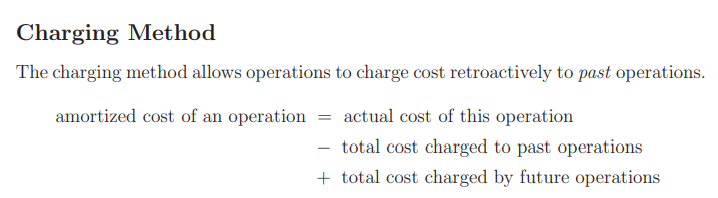

Table Doubling

In [17]:
class TableDoublingAccountingMethod:
    def __init__(self):
        self.total_cost = 0
        self.balance = 0

    def operation(self, operation_type):
        if operation_type == "insert":
            self.total_cost += 1
            self.balance += 1
            if self.balance >= self.total_cost:
                self.balance -= self.total_cost
                self.total_cost *= 2

    def amortized_cost(self):
        return 1

# Example Usage:
table_doubling_ac = TableDoublingAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    table_doubling_ac.operation(op_type)

print("Amortized cost using Accounting Method for Table Doubling:", table_doubling_ac.amortized_cost())


Amortized cost using Accounting Method for Table Doubling: 1


Binary Counter

In [18]:
class BinaryCounterAccountingMethod:
    def __init__(self, size):
        self.total_cost = 0
        self.balance = 0

    def operation(self, operation_type):
        if operation_type == "increment":
            self.total_cost += 1
            self.balance += 1
            if self.balance >= self.total_cost:
                self.balance -= self.total_cost
                self.total_cost *= 2

    def amortized_cost(self):
        return 1

# Example Usage:
binary_counter_ac = BinaryCounterAccountingMethod(4)  # Example: Binary counter of size 4
operations = ["increment"] * 10  # Example: 10 increment operations
for op_type in operations:
    binary_counter_ac.operation(op_type)

print("Amortized cost using Accounting Method for Binary Counter:", binary_counter_ac.amortized_cost())


Amortized cost using Accounting Method for Binary Counter: 1


2-3 Tree

In [19]:
class TwoThreeTreeAccountingMethod:
    def __init__(self):
        self.total_cost = 0
        self.balance = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.total_cost += 1
            self.balance += created_nodes
            if self.balance >= self.total_cost:
                self.balance -= self.total_cost
                self.total_cost *= 2

    def amortized_cost(self):
        return 1

# Example Usage:
two_three_tree_ac = TwoThreeTreeAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_three_tree_ac.operation(op_type, created_nodes=2)  # Assuming each insert operation creates 2 nodes

print("Amortized cost using Accounting Method for 2-3 Tree:", two_three_tree_ac.amortized_cost())


Amortized cost using Accounting Method for 2-3 Tree: 1


2-5 Tree

In [20]:
class TwoFiveTreeAccountingMethod:
    def __init__(self):
        self.total_cost = 0
        self.balance = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.total_cost += 1
            self.balance += created_nodes
            if self.balance >= self.total_cost:
                self.balance -= self.total_cost
                self.total_cost *= 2

    def amortized_cost(self):
        return 1

# Example Usage:
two_five_tree_ac = TwoFiveTreeAccountingMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_five_tree_ac.operation(op_type, created_nodes=3)  # Assuming each insert operation creates 3 nodes

print("Amortized cost using Accounting Method for 2-5 Tree:", two_five_tree_ac.amortized_cost())


Amortized cost using Accounting Method for 2-5 Tree: 1


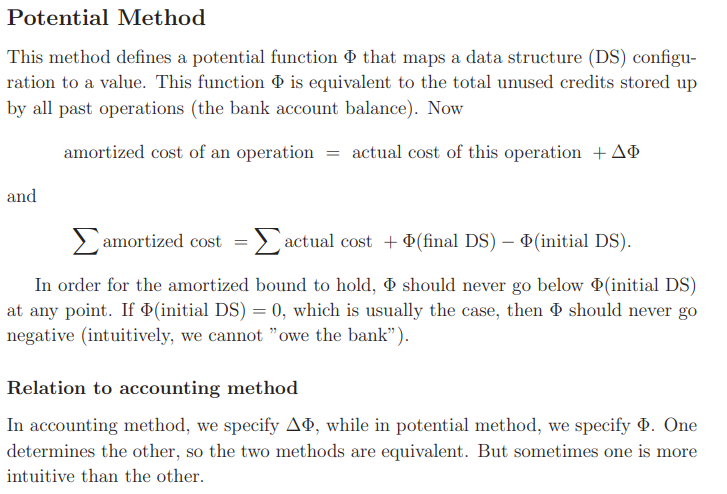

Table Doubling

In [21]:
class TableDoublingPotentialMethod:
    def __init__(self):
        self.size = 0
        self.potential = 0

    def operation(self, operation_type):
        if operation_type == "insert":
            self.size += 1
            if self.size & (self.size - 1) == 0:  # check if size is a power of 2
                self.potential += self.size

    def amortized_cost(self):
        return 1 + self.potential / self.size if self.size > 0 else 0

# Example Usage:
table_doubling_pm = TableDoublingPotentialMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    table_doubling_pm.operation(op_type)

print("Amortized cost using Potential Method for Table Doubling:", table_doubling_pm.amortized_cost())


Amortized cost using Potential Method for Table Doubling: 2.5


Binary Counter

In [22]:
class BinaryCounterPotentialMethod:
    def __init__(self, size):
        self.size = size
        self.count = 0
        self.potential = 0

    def operation(self, operation_type):
        if operation_type == "increment":
            self.count += 1
            if self.count & (self.count - 1) == 0:  # check if count is a power of 2
                self.potential += self.size

    def amortized_cost(self):
        return 1 + self.potential / self.size if self.size > 0 else 0

# Example Usage:
binary_counter_pm = BinaryCounterPotentialMethod(4)  # Example: Binary counter of size 4
operations = ["increment"] * 10  # Example: 10 increment operations
for op_type in operations:
    binary_counter_pm.operation(op_type)

print("Amortized cost using Potential Method for Binary Counter:", binary_counter_pm.amortized_cost())


Amortized cost using Potential Method for Binary Counter: 5.0


2-3 Tree

In [23]:
class TwoThreeTreePotentialMethod:
    def __init__(self):
        self.total_nodes = 0
        self.internal_nodes = 0
        self.potential = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.total_nodes += 1
            self.internal_nodes += created_nodes
            if self.total_nodes & (self.total_nodes - 1) == 0:  # check if total nodes is a power of 2
                self.potential += self.internal_nodes

    def amortized_cost(self):
        return 1 + self.potential / self.total_nodes if self.total_nodes > 0 else 0

# Example Usage:
two_three_tree_pm = TwoThreeTreePotentialMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_three_tree_pm.operation(op_type, created_nodes=2)  # Assuming each insert operation creates 2 nodes

print("Amortized cost using Potential Method for 2-3 Tree:", two_three_tree_pm.amortized_cost())


Amortized cost using Potential Method for 2-3 Tree: 4.0


2-5 Tree

In [24]:
class TwoFiveTreePotentialMethod:
    def __init__(self):
        self.total_nodes = 0
        self.internal_nodes = 0
        self.potential = 0

    def operation(self, operation_type, created_nodes=0):
        if operation_type == "insert":
            self.total_nodes += 1
            self.internal_nodes += created_nodes
            if self.total_nodes & (self.total_nodes - 1) == 0:  # check if total nodes is a power of 2
                self.potential += self.internal_nodes

    def amortized_cost(self):
        return 1 + self.potential / self.total_nodes if self.total_nodes > 0 else 0

# Example Usage:
two_five_tree_pm = TwoFiveTreePotentialMethod()
operations = ["insert"] * 10  # Example: 10 insert operations
for op_type in operations:
    two_five_tree_pm.operation(op_type, created_nodes=3)  # Assuming each insert operation creates 3 nodes

print("Amortized cost using Potential Method for 2-5 Tree:", two_five_tree_pm.amortized_cost())


Amortized cost using Potential Method for 2-5 Tree: 5.5
